In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea

In [39]:
def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = int((90-top)*resolution)
    lowerindex = int((90-bottom)*resolution)
    leftindex = int((180+left)*resolution)
    rightindex = int((180+right)*resolution)
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
def city_mask(city_index):
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    city_path = f'{root_dir}/dat/cty_msk_/gpw4/city_{city_index:08}.gl5'
    city_mask = np.fromfile(city_path, 'float32').reshape(2160, 4320)
    return city_mask

def downtown_mask(city_index):
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    dwn_path = f'{root_dir}/dat/vld_cty_/city_{city_index:08}.gl5'
    dwn_mask = np.fromfile(dwn_path, 'float32').reshape(2160, 4320)
    return dwn_mask

def summary_mask():
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    smry_path = f'{root_dir}/dat/vld_cty_/city_00000000.gl5'
    smry_mask = np.fromfile(smry_path, 'float32').reshape(2160, 4320)
    return smry_mask
    
def population():
    root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    pop_path = f'{root_dir}/dat/pop_tot_/GPW4ag__20100000.gl5'
    pop_tot_ = np.fromfile(pop_path, 'float32').reshape(2160, 4320)
    return pop_tot_
    
def crop(dat, left, right, bottom, top):
    upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(left, right, bottom, top)
    dat_cropped = dat[upperindex:lowerindex, leftindex:rightindex]
    dat_masked = np.ma.masked_where(dat_cropped == 0, dat_cropped)
    return dat_masked

In [40]:
def draw(extent, image, cmap='jet_r'):
    fig = plt.figure()
    projection = ccrs.PlateCarree()
    ax = plt.subplot(projection=projection)
    ax.set_extent(extent, projection)
    gl = ax.gridlines(draw_labels=True, zorder=0)
    gl.right_labels = False 
    gl.bottom_labels = False
    ax.add_feature(cfea.OCEAN, color='#BBBBBB')
    ax.add_feature(cfea.LAKES, color='#BBBBBB')
    ax.coastlines(zorder=1)
    
    img = ax.imshow(image,
                origin='upper',
                extent=extent,
                transform=projection,
                cmap=cmap,
    ) 
    #fig.colorbar(img, ax=ax, orientation='vertical', shrink=1, pad=0.08)

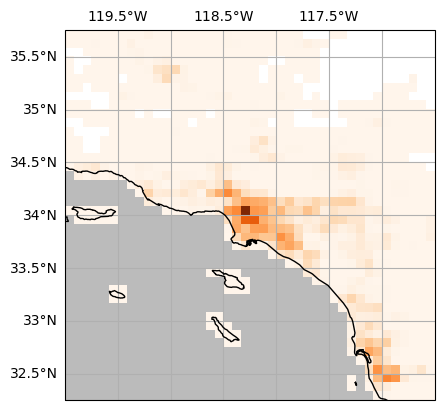

In [41]:
pop = population()
pop_masked = crop(pop, -120.0, -116.5, 32.25, 35.75)
draw(img_extent, pop_masked, cmap='Oranges')

12259786.0


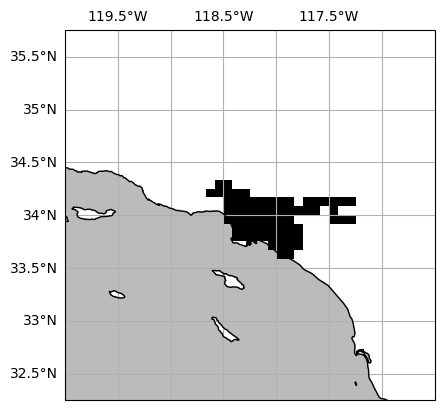

In [52]:
city = city_mask(17)
city_masked = crop(city, -120.0, -116.5, 32.25, 35.75)
draw(img_extent, city_masked, cmap='gray')

pop_sum = np.sum(pop_masked[city_masked > 0])
print(pop_sum)

5272369.0


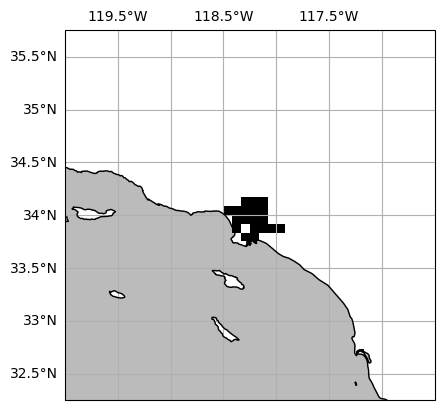

In [54]:
dwn = downtown_mask(17)
dwn_masked = crop(dwn, -120.0, -116.5, 32.25, 35.75)
draw(img_extent, dwn_masked, cmap='gray')
pop_sum = np.sum(pop_masked[dwn_masked > 0])
print(pop_sum)

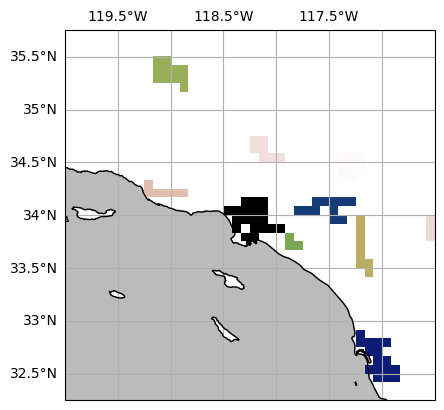

In [45]:
smry = summary_mask()
smry_masked = crop(smry, -120.0, -116.5, 32.25, 35.75)
draw(img_extent, smry_masked, cmap='gist_earth')